# importing data processing , data Visualisation ,ML libaries.

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Load Dataset to df.

In [2]:
#df=pd.read_csv(https://docs.google.com/spreadsheets/d/1BSO9_52GLGwe2WrtB3TpS9QqXGk3mM0L/edit#gid=2056640585,parse_dates=['Date']))
df = pd.read_csv("C:/Users/swati/Downloads/Random Price Dataset Trial Assignment.xlsx - Raw data.csv",parse_dates=['Date'])
df

,Date,market,Spot/Export Blow Molding,"Spot, Domestic",WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,...,Russia_import,South_Africa_import,Turkey_import,Brazil_import,France_import,Germeny_import,United Kingdome_import,China_import,Japan_import,South_korea_import
0,2000-01-01,41,NaN,NaN,27.18,25.51,1.289,6902.10000,863.10000,29.207387,...,NaN,NaN,"68,33,222.00","26,49,293.00","3,52,39,920.00",NaN,NaN,NaN,NaN,NaN
1,2000-01-02,41,NaN,NaN,29.35,27.78,1.377,6584.40000,972.70000,33.391099,...,NaN,NaN,"56,47,987.00","27,87,667.00","3,67,16,752.00",NaN,NaN,NaN,NaN,NaN
2,2000-01-03,45,NaN,NaN,29.89,27.49,1.516,6424.10000,1330.50000,30.941913,...,NaN,NaN,"67,21,125.00","46,92,701.00","4,51,44,561.00",NaN,NaN,NaN,NaN,NaN
3,2000-01-04,47,NaN,NaN,25.74,22.76,1.465,7070.50000,1227.50000,31.930148,...,NaN,NaN,"71,69,182.00","25,65,068.00","3,22,40,349.00",NaN,NaN,NaN,NaN,NaN
4,2000-01-05,47,NaN,NaN,28.78,27.74,1.487,7850.20000,1526.30000,31.201702,...,NaN,NaN,"1,04,66,333.00","46,71,325.00","2,93,51,633.00",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2022-01-08,93,NaN,NaN,93.67,100.45,3.975,50348.83658,12906.70000,73.304558,...,NaN,"1,93,10,108.00",NaN,NaN,NaN,"14,41,31,334.00","8,18,72,550.00",NaN,"2,60,97,012.00",NaN
272,2022-01-09,90,NaN,NaN,84.26,89.76,3.700,49247.89150,11953.51058,66.956499,...,NaN,"1,44,10,445.00",NaN,NaN,NaN,"11,33,10,929.00","7,44,77,441.00",NaN,"2,12,77,339.00",NaN
273,2022-01-10,90,NaN,NaN,87.55,93.33,3.815,44571.96712,15698.33965,68.535729,...,NaN,"1,67,83,023.00",NaN,NaN,NaN,"11,93,07,001.00","10,94,21,098.00",NaN,NaN,NaN
274,2022-01-11,90,NaN,NaN,84.37,91.42,3.685,36876.43705,15576.00600,65.265834,...,NaN,"1,10,79,039.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# reset index and drop the 'Id' column,this process is part of feature selection

In [3]:
df00=df.drop(['Australia _export','Canada_export','Saudi_export','Usa_export','India_export','Russia_export','South_Africa_export','Turkey','Brazil','France_export','Germeny_export','United Kingdome_export','China_export','Australia _import','Canada_import','Saudi_import','Usa_import','India_import','Russia_import','South_Africa_import','Turkey_import','Brazil_import','France_import','Germeny_import','United Kingdome_import','China_import','Japan_import','South_korea_import'
],axis=1)
df00.head()

,Date,market,Spot/Export Blow Molding,"Spot, Domestic",WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,...,PCU32611332611301,WPU0915021625,PCU3252132521,MHHNGSP,WPU072205011,PCU32611132611115,PCU32611332611301.1,PCU32611132611112,WPU0915021622,Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials
0,2000-01-01,41,NaN,NaN,27.18,25.51,1.289,6902.1,863.1,29.207387,...,106.3,NaN,NaN,2.42,NaN,NaN,106.3,NaN,NaN,139.4
1,2000-01-02,41,NaN,NaN,29.35,27.78,1.377,6584.4,972.7,33.391099,...,105.6,NaN,NaN,2.66,NaN,NaN,105.6,NaN,NaN,141.7
2,2000-01-03,45,NaN,NaN,29.89,27.49,1.516,6424.1,1330.5,30.941913,...,106.1,NaN,NaN,2.79,NaN,NaN,106.1,NaN,NaN,146.3
3,2000-01-04,47,NaN,NaN,25.74,22.76,1.465,7070.5,1227.5,31.930148,...,106.9,NaN,NaN,3.04,NaN,NaN,106.9,NaN,NaN,151.4
4,2000-01-05,47,NaN,NaN,28.78,27.74,1.487,7850.2,1526.3,31.201702,...,106.3,NaN,NaN,3.59,NaN,NaN,106.3,NaN,NaN,155.6


In [4]:
df00.shape #Shape of dataset

(276, 22)

# Checking dataset informations

In [5]:
df00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 22 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype         
---  ------                                                                                                                      --------------  -----         
 0   Date                                                                                                                        276 non-null    datetime64[ns]
 1   market                                                                                                                      276 non-null    int64         
 2   Spot/Export Blow Molding                                                                                                    185 non-null    float64       
 3   Spot, Domestic                                                                            

# Checking statistical analysis of numerical values

In [6]:
df00.describe()

,market,Spot/Export Blow Molding,"Spot, Domestic",WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,WPUFD4111,...,PCU32611332611301,WPU0915021625,PCU3252132521,MHHNGSP,WPU072205011,PCU32611132611115,PCU32611332611301.1,PCU32611132611112,WPU0915021622,Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials
count,276.000000,185.000000,125.000000,276.000000,276.000000,276.000000,275.000000,275.000000,275.000000,275.000000,...,275.000000,132.000000,228.000000,276.000000,115.000000,115.000000,204.000000,115.000000,133.000000,276.000000
mean,72.376812,57.979730,60.396000,62.505688,65.403768,2.570399,29591.894216,7176.495470,89.579463,185.978265,...,148.154295,108.867076,164.035908,4.515036,106.618957,135.447026,201.243686,128.043139,111.183992,222.319692
std,19.413099,13.116195,12.647484,26.065922,29.612183,0.780782,12303.526704,3764.254058,46.390987,31.712684,...,98.399907,10.688070,25.562316,2.171598,11.893776,15.067526,50.819024,14.146347,12.070776,51.941508
min,32.000000,28.000000,33.250000,16.550000,18.380000,1.086000,6375.600000,863.100000,22.119907,135.000000,...,0.000000,99.500000,100.000000,1.630000,94.100000,100.000000,102.800000,100.000000,99.200000,122.900000
25%,57.750000,49.000000,53.000000,41.000000,42.727500,1.982000,20508.605665,3644.347996,60.831129,155.650000,...,0.000000,103.000000,145.000000,2.877500,99.700000,126.900000,152.800000,120.000000,104.100000,193.375000
50%,73.000000,59.000000,59.000000,59.280000,62.770000,2.555000,31563.988160,8080.515063,78.408574,193.400000,...,181.400000,105.000000,165.550000,3.965000,102.000000,130.200000,215.600000,123.100000,107.200000,227.550000
75%,86.000000,67.000000,67.500000,84.170000,85.587500,3.149000,39575.405920,9741.468033,107.593858,208.600000,...,224.450000,107.525000,176.950000,5.735000,106.250000,133.050000,231.900000,127.150000,111.400000,249.000000
max,108.000000,92.000000,100.750000,133.930000,132.720000,4.929000,52081.070500,16678.510020,280.787619,278.025000,...,312.788000,143.787000,231.260000,13.420000,138.090000,179.097000,311.130000,168.906000,147.624000,359.606000


In [7]:
new_df=df00.dropna(how="all")


In [8]:
df3 =new_df.fillna(new_df.median(numeric_only=True))


In [9]:
df3.isnull().sum()

Date                                                                                                                          0
market                                                                                                                        0
Spot/Export Blow Molding                                                                                                      0
Spot, Domestic                                                                                                                0
WTISPLC                                                                                                                       0
MCOILBRENTEU                                                                                                                  0
GASREGM                                                                                                                       0
IMPCH                                                                                                   

In [10]:
df4=df3.fillna("no_event")

# Visualisation multiple graphs

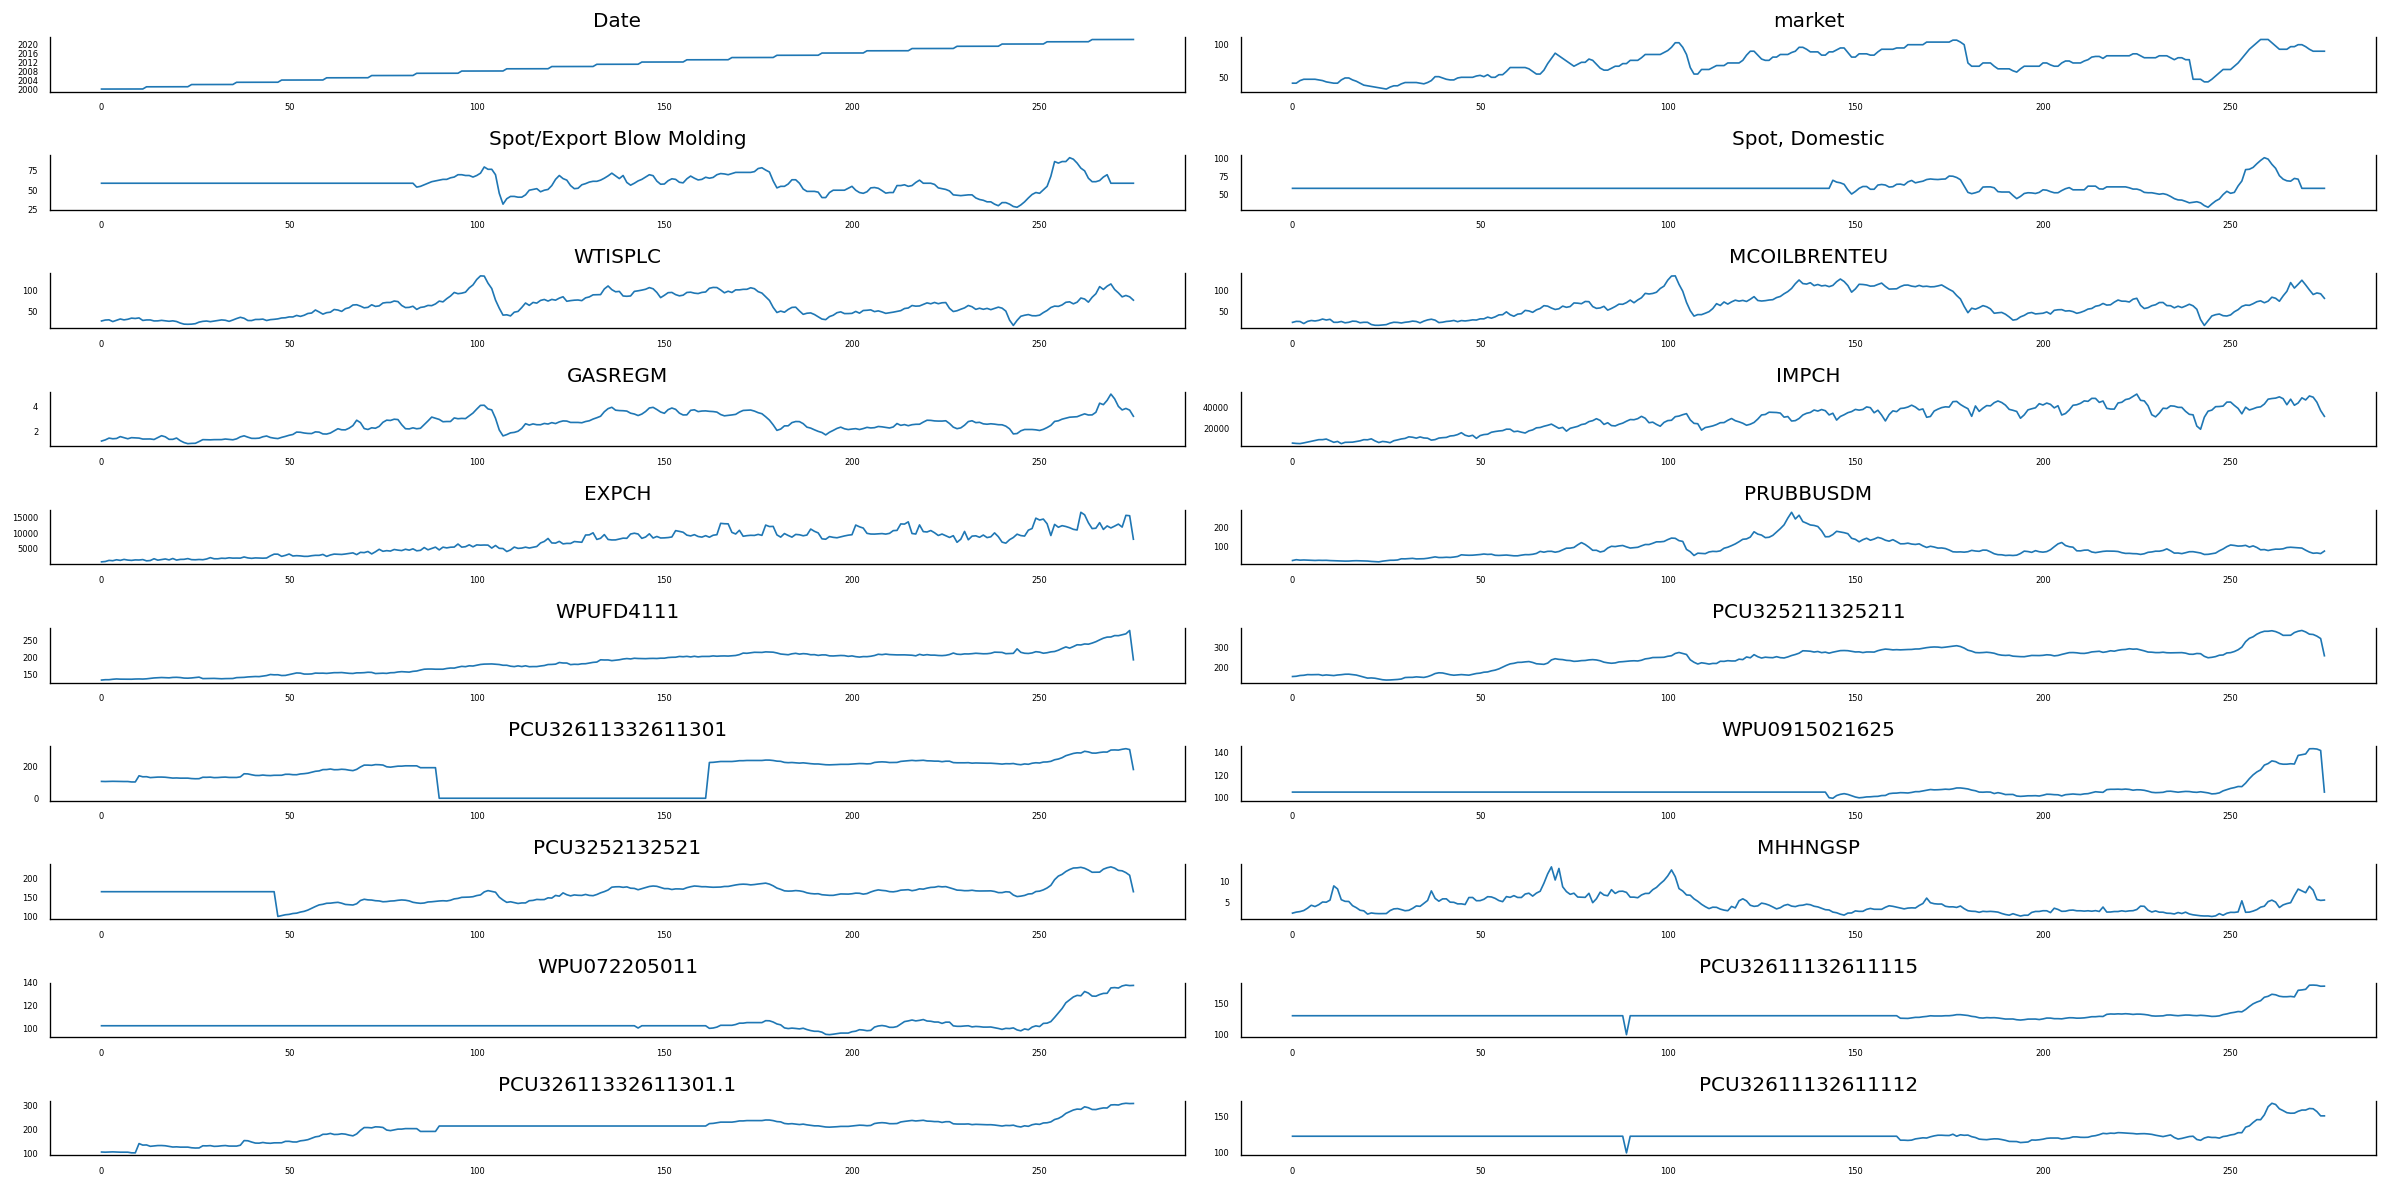

In [11]:
fig,axes=plt.subplots(nrows=10,ncols=2,dpi=120,figsize=(20,10))
for i,ax in enumerate(axes.flatten()):
    data=df4[df4.columns[i]]
    ax.plot(data,linewidth=1)
    ax.set_title(df4.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=5)

plt.tight_layout();

# Testing For Stationarity

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(df['market'])

1. ADF :  -2.239716767643178
2. P-Value :  0.19214751697964388
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression: 271
5. Critical Values :
	 1% :  -3.4547128138328875
	 5% :  -2.8722649771800155
	 10% :  -2.5724850011573914


In [14]:
df['First Difference'] = df['market'] - df['market'].shift(1)

In [15]:
df['market'].shift(1)

0       NaN
1      41.0
2      41.0
3      45.0
4      47.0
       ... 
271    97.0
272    93.0
273    90.0
274    90.0
275    90.0
Name: market, Length: 276, dtype: float64

In [16]:
df['First Difference']=df['market']-df['market'].shift(8)

In [17]:
adf_test(df['First Difference'].dropna())

1. ADF :  -3.1697319509267583
2. P-Value :  0.02180493440543588
3. Num Of Lags :  16
4. Num Of Observations Used For ADF Regression: 251
5. Critical Values :
	 1% :  -3.4566744514553016
	 5% :  -2.8731248767783426
	 10% :  -2.5729436702592023


# SARIMAX

In [18]:
import statsmodels.api as sm

In [19]:
model=sm.tsa.statespace.SARIMAX(df['market'],order=(1, 1, 1),domestic_market=(1,1,1,12))
results=model.fit()

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 market   No. Observations:                  276
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -762.949
Date:                Mon, 01 May 2023   AIC                           1531.897
Time:                        03:52:11   BIC                           1542.748
Sample:                             0   HQIC                          1536.252
                                - 276                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3432      0.186      1.841      0.066      -0.022       0.708
ma.L1          0.0676      0.196      0.344      0.731      -0.317       0.452
sigma2        15.0322      0.464     32.373      0.000      14.122      15.942
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5221.05
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.51   Skew:                            -2.90
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
df4.rename(columns = {'market':'domestic_market'}, inplace = True)
df4['domestic_market'] = df4['domestic_market'].apply(lambda x: x.replace(',', '') if type(int) is str else int)

In [22]:
df4=df4.drop(columns = df4.columns[20:])

In [23]:
a=[
41,
41,
45,
47,
47,
47,
47,
46,
45,
43,
42,
41,
41,
46,
49,
49,
46,
44,
41,
38,
37,
36,
35,
34,
33,
32,
35,
37,
37,
40,
42,
42,
42,
42,
41,
40,
42,
45,
51,
51,
49,
47,
46,
46,
49,
50,
50,
50,
50,
52,
53,
51,
54,
50,
50,
54,
54,
59,
65,
65,
65,
65,
65,
63,
59,
55,
55,
61,
71,
79,
87,
83,
79,
75,
71,
67,
70,
73,
73,
78,
76,
70,
64,
61,
61,
64,
67,
67,
71,
71,
76,
76,
76,
80,
85,
85,
85,
85,
85,
88,
91,
96,
103,
103,
96,
85,
65,
55,
55,
62,
62,
62,
65,
68,
68,
68,
72,
72,
72,
72,
76,
84,
90,
90,
84,
78,
76,
76,
81,
81,
85,
85,
85,
88,
90,
96,
96,
93,
89,
89,
89,
84,
84,
89,
89,
92,
95,
95,
88,
81,
81,
86,
86,
86,
84,
84,
89,
93,
93,
93,
93,
95,
95,
95,
100,
100,
100,
100,
100,
104,
104,
104,
104,
104,
104,
104,
107,
107,
104,
100,
72,
67,
67,
67,
72,
72,
72,
67,
63,
63,
63,
63,
60,
58,
63,
67,
67,
67,
67,
67,
72,
72,
69,
67,
67,
72,
75,
75,
72,
72,
72,
75,
77,
81,
82,
82,
79,
83,
83,
83,
83,
83,
83,
83,
86,
86,
83,
80,
80,
80,
80,
83,
83,
83,
80,
77,
80,
80,
77,
77,
47,
47,
47,
43,
43,
47,
52,
57,
62,
62,
62,
67,
72,
79,
86,
93,
98,
103,
108,
108,
108,
103,
98,
93,
93,
93,
97,
97,
100,
100,
97,
93,
90,
90,
90,
90
]


In [24]:
arr=np.array(a)
type(arr)

numpy.ndarray

In [25]:
b=np.shape(arr)
np.shape(arr)

(276,)

In [26]:
nunique_train=df.nunique().reset_index()
remove_col=nunique_train[(nunique_train[0]==len(df00)) | (nunique_train[0]==0) | (nunique_train[0]==1) ]['index'].tolist()
remove_col

['Date', 'South_korea_import']

In [27]:
np.shape(arr)

(276,)

# LazyClassifier

In [28]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

data = df4
X = data.drop(columns = df3.columns[0])
y=arr



In [29]:
np.shape(X)

(276, 19)

In [30]:
np.shape(y)

(276,)

In [31]:
type(X)

pandas.core.frame.DataFrame

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.20,random_state =42,shuffle=True, )

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(220, 19)
(56, 19)
(220,)
(56,)


In [34]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models=clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:03<00:00,  9.66it/s]

(                             Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                        
LabelPropagation                 0.48               0.49    None      0.50   
LabelSpreading                   0.48               0.49    None      0.50   
BaggingClassifier                0.45               0.42    None      0.42   
RandomForestClassifier           0.41               0.42    None      0.40   
ExtraTreesClassifier             0.41               0.41    None      0.44   
LGBMClassifier                   0.38               0.38    None      0.37   
KNeighborsClassifier             0.30               0.30    None      0.31   
ExtraTreeClassifier              0.21               0.24    None      0.20   
CalibratedClassifierCV           0.25               0.23    None      0.19   
LogisticRegression               0.29               0.23    None      0.28   
LinearSVC                        0.21               0.22    Non

In [35]:
models

(                             Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
 Model                                                                        
 LabelPropagation                 0.48               0.49    None      0.50   
 LabelSpreading                   0.48               0.49    None      0.50   
 BaggingClassifier                0.45               0.42    None      0.42   
 RandomForestClassifier           0.41               0.42    None      0.40   
 ExtraTreesClassifier             0.41               0.41    None      0.44   
 LGBMClassifier                   0.38               0.38    None      0.37   
 KNeighborsClassifier             0.30               0.30    None      0.31   
 ExtraTreeClassifier              0.21               0.24    None      0.20   
 CalibratedClassifierCV           0.25               0.23    None      0.19   
 LogisticRegression               0.29               0.23    None      0.28   
 LinearSVC                        0.21              

# LazyRegressor

In [40]:
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle
import numpy as np

boston = df3
X1 = boston.drop(columns = df3.columns[0])
y1=arr
#X, y = shuffle(X1, y1, random_state=42)
offset = int(X.shape[0] * 0.9)

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 19.13it/s]

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
XGBRegressor                                 0.37       0.81   5.87   
LGBMRegressor                                0.22       0.77   6.52   
RandomForestRegressor                        0.21       0.77   6.58   
HistGradientBoostingRegressor                0.20       0.76   6.61   
ExtraTreesRegressor                          0.14       0.75   6.85   
GradientBoostingRegressor                    0.10       0.73   7.01   
BaggingRegressor                             0.10       0.73   7.01   
DecisionTreeRegressor                        0.05       0.72   7.22   
AdaBoostRegressor                            0.03       0.71   7.29   
LarsCV                                      -0.03       0.69   7.51   
ExtraTreeRegressor                          -1.08       0.38  10.65   
KNeighborsRegressor                         -1.23       0.34  11.04   
Orthog

In [41]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.37,0.81,5.87,0.08
LGBMRegressor,0.22,0.77,6.52,0.05
RandomForestRegressor,0.21,0.77,6.58,0.20
HistGradientBoostingRegressor,0.20,0.76,6.61,0.18
ExtraTreesRegressor,0.14,0.75,6.85,0.16
GradientBoostingRegressor,0.10,0.73,7.01,0.12
BaggingRegressor,0.10,0.73,7.01,0.03
DecisionTreeRegressor,0.05,0.72,7.22,0.01
AdaBoostRegressor,0.03,0.71,7.29,0.09


# Data , Train test split

In [44]:
data = df3
X = data.drop(columns = df4.columns[0])
y=arr
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.20,random_state =42,shuffle=True, )

# LogisticRegression

In [45]:
from sklearn.linear_model import LogisticRegression
model_lr =LogisticRegression()
model_lr.fit(X_train, y_train)
y_preds_lr = model_lr.predict(X_test)
print(classification_report(y_test, y_preds_lr))

              precision    recall  f1-score   support

          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         0
          42       0.00      0.00      0.00         2
          43       0.00      0.00      0.00         1
          46       0.00      0.00      0.00         1
          47       0.00      0.00      0.00         1
          49       0.00      0.00      0.00         1
          50       0.00      0.00      0.00         2
          55       0.00      0.00      0.00         1
          61       0.00      0.00      0.00         1
          62       0.00      0.00      0.00         1
          65       0.00      0.00      0.00         1
          67       0.50      0.20      0.29         5
          68       0.00      0.00      0.00         1
          71       0.00    

# RandomForestClassifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_preds_rf = model_rf.predict(X_test)
print(classification_report(y_test, y_preds_rf))

              precision    recall  f1-score   support

          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         0
          35       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         0
          42       1.00      0.50      0.67         2
          43       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         0
          46       1.00      1.00      1.00         1
          47       1.00      1.00      1.00         1
          49       1.00      1.00      1.00         1
          50       1.00      1.00      1.00         2
          55       1.00      1.00      1.00         1
          61       0.00      0.00      0.00         1
          62       1.00      1.00      1.00         1
          64       0.00      0.00      0.00         0
          65       1.00    

In [47]:
scores = cross_val_score( RandomForestClassifier(), X, y, cv=5)
scores

array([0.35714286, 0.61818182, 0.69090909, 0.69090909, 0.43636364])

In [48]:
scores.mean()

0.5587012987012987

# DecisionTreeClassifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
model_dtc =DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)
y_preds_dtc = model_dtc.predict(X_test)
print(classification_report(y_test, y_preds_dtc))


              precision    recall  f1-score   support

          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         0
          35       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         0
          42       1.00      1.00      1.00         2
          43       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         0
          46       1.00      1.00      1.00         1
          47       1.00      1.00      1.00         1
          49       1.00      1.00      1.00         1
          50       1.00      1.00      1.00         2
          55       1.00      1.00      1.00         1
          59       0.00      0.00      0.00         0
          61       0.00      0.00      0.00         1
          62       1.00      1.00      1.00         1
          65       1.00    

In [50]:
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
scores

array([0.69642857, 0.81818182, 0.83636364, 0.78181818, 0.72727273])

In [51]:
scores.mean()

0.772012987012987

# Train using Bagging

In [52]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score

True

In [53]:
bag_model.score(X_test, y_test)

0.8392857142857143

# SVC

In [54]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_preds_svm = model_svm.predict(X_test)
print(classification_report(y_test, y_preds_svm))

              precision    recall  f1-score   support

          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         2
          43       0.00      0.00      0.00         1
          46       0.00      0.00      0.00         1
          47       0.07      1.00      0.12         1
          49       0.00      0.00      0.00         1
          50       0.00      0.00      0.00         2
          55       0.00      0.00      0.00         1
          61       0.00      0.00      0.00         1
          62       0.00      0.00      0.00         1
          65       0.00      0.00      0.00         1
          67       0.00      0.00      0.00         5
          68       0.00      0.00      0.00         1
          71       0.00      0.00      0.00         1
          72       0.11    

# LinearRegression

In [55]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Accuracy for test data

In [56]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [57]:
mae(y_test,y_pred)

2.4361465226060577e-13

In [58]:
mse(y_test,y_pred)

8.644653343773936e-26